In [1]:
import scanpy as sc
import squidpy as sq
import anndata as ad
import schist as scs
import pandas as pd
%pylab 
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)


  0%|          | 0.00/7.86M [00:00<?, ?B/s]

  0%|          | 0.00/29.3M [00:00<?, ?B/s]

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)


#cells after MT filter: 3861


Trying to set attribute `.var` of view, copying.


In [4]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)


In [5]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")


... storing 'feature_types' as categorical
... storing 'genome' as categorical


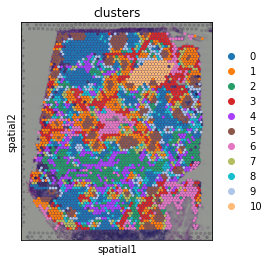

In [6]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

In [7]:
scs.inference.leiden(adata)

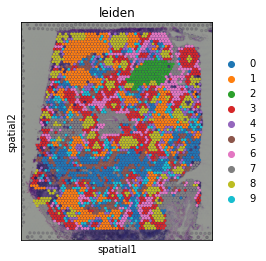

In [8]:
sc.pl.spatial(adata, img_key="hires", color="leiden", size=1.5)

In [9]:
scs.inference.nested_model(adata)

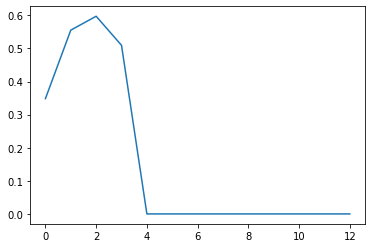

In [10]:
plot(adata.uns['schist']['stats']['modularity'])

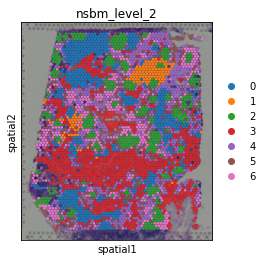

In [13]:
sc.pl.spatial(adata, img_key="hires", color="nsbm_level_2", size=1.5)

In [ ]:
sc.tl.rank_genes_groups(adata, "nsbm_level_2", method="t-test")

categories: 0, 1, 2, etc.
var_group_labels: 6


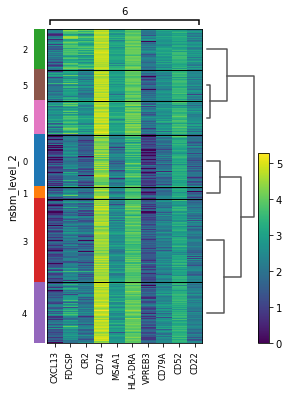

In [19]:
sc.pl.rank_genes_groups_heatmap(adata, groups="6", n_genes=10, groupby="nsbm_level_2")

In [16]:
scs.io.write(adata, 'visium_lymph')

In [2]:
adata = scs.io.read('visium_lymph')

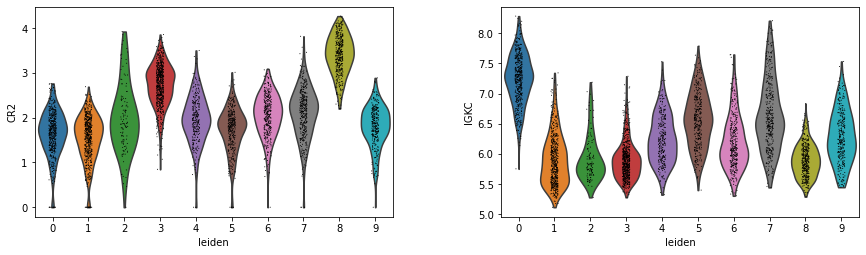

In [17]:
sc.pl.violin(adata, keys=['CR2', 'IGKC'], groupby='leiden')

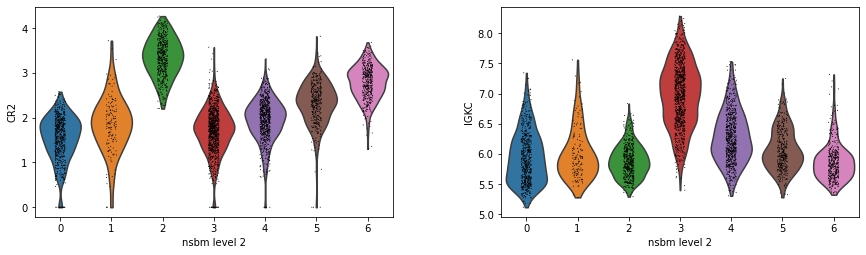

In [18]:
sc.pl.violin(adata, keys=['CR2', 'IGKC'], groupby='nsbm_level_2')

In [20]:
adata.obs['marginal_2'] = np.max(adata.obsm['CM_nsbm_level_2'], axis=1)

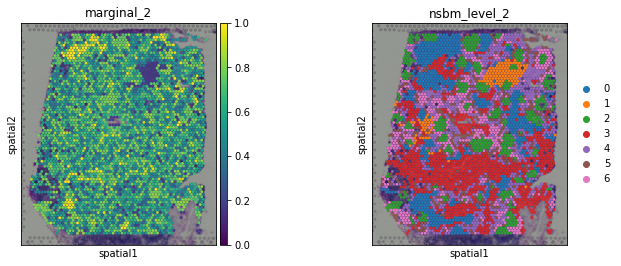

In [23]:
sc.pl.spatial(adata, img_key="hires", 
              color=["marginal_2", 'nsbm_level_2'], size=1.5, vmin=0, 
              vmax=1)

In [24]:
adata.obs['marginal_leiden'] = np.max(adata.obsm['CM_leiden'], axis=1)

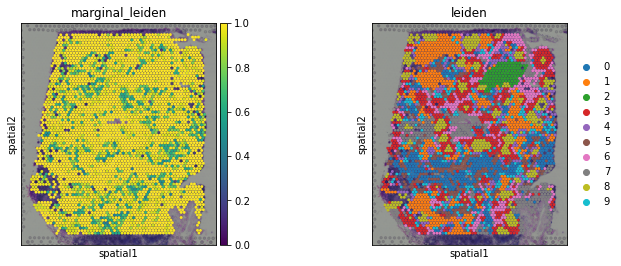

In [25]:
sc.pl.spatial(adata, img_key="hires", 
              color=["marginal_leiden", 'leiden'], size=1.5, vmin=0, 
              vmax=1)

In [26]:
scs.tl.cell_similarity(adata)

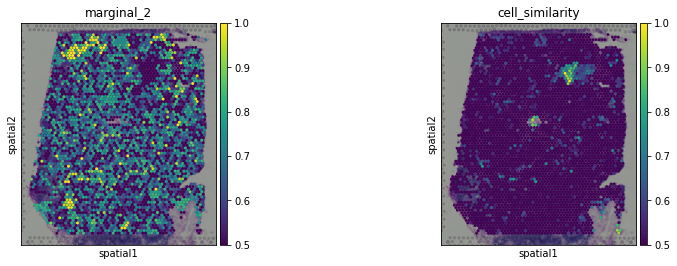

In [29]:
sc.pl.spatial(adata, img_key="hires", 
              color=["marginal_2", 'cell_similarity'], size=1.5, vmin=0.5, 
              vmax=1)

In [30]:
scs.tl.cell_stability(adata)

They will be recalculated from scratch


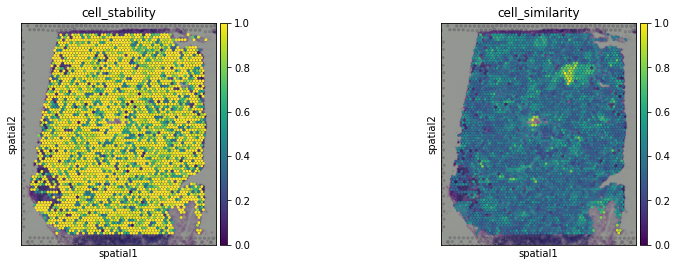

In [31]:
sc.pl.spatial(adata, img_key="hires", 
              color=["cell_stability", 'cell_similarity'], 
              size=1.5, vmin=0, vmax=1)

In [32]:
scs.inference.planted_model(adata)

In [33]:
adata.obs['marginal_p'] = np.max(adata.obsm['CM_ppbm'], axis=1)

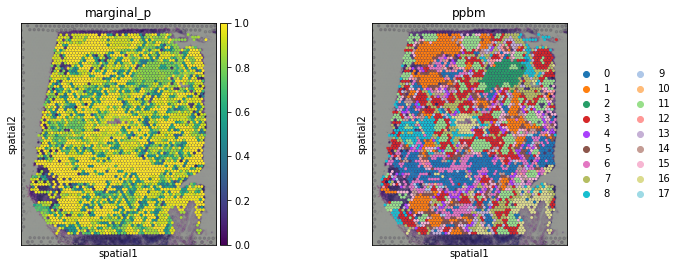

In [34]:
sc.pl.spatial(adata, img_key="hires", 
              color=["marginal_p", 'ppbm'], size=1.5, vmin=0, 
              vmax=1)

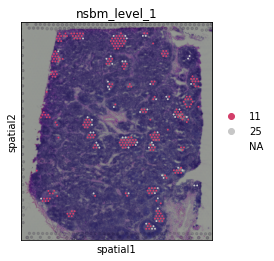

In [9]:
sc.pl.spatial(adata, img_key="hires", 
              color=["nsbm_level_1"], groups=['11', '25'])

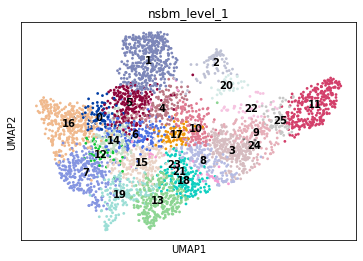

In [6]:
sc.pl.umap(adata, color='nsbm_level_1', legend_loc='on data')

In [14]:
ii = pd.crosstab(adata.obs['nsbm_level_0'], adata.obs['nsbm_level_1'])['11'].sort_values(ascending=False).head(7).index

In [21]:
adata.obs['zero'] = np.array(adata.obs['nsbm_level_0'].values)

In [34]:
cellin = adata.obs_names[np.bitwise_not(adata.obs['nsbm_level_0'].isin(ii))]

In [36]:
adata.obs.loc[cellin, 'zero'] = 'foo'
adata.obs['zero'] = pd.Categorical(adata.obs['zero'])

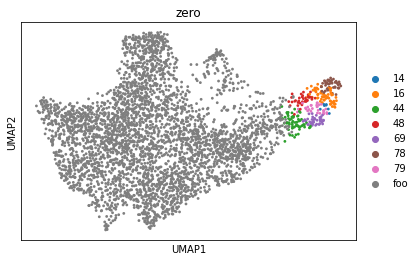

In [37]:
sc.pl.umap(adata, color='zero')

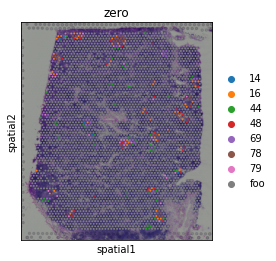

In [38]:
sc.pl.spatial(adata, img_key="hires", 
              color=["zero"])